## 1. 图像预处理

### 1.1 训练数据分析

In [1]:
# 训练数据分析
import os
import cv2
import matplotlib.pyplot as plt
from utils import *

Using TensorFlow backend.


In [2]:
# 检查图像类别、数量及图像尺寸分布

# cat图像路径
cat_images_path = "/home/sakulaki/code/udapro/dogcat/data/train/cat"
cat_images = os.listdir(cat_images_path)
cat_count = len(cat_images)
print("cat images number count: %s" % cat_count)

# dog图像路径
dog_images_path = "/home/sakulaki/code/udapro/dogcat/data/train/dog"
dog_images = os.listdir(dog_images_path)
dog_count = len(dog_images)
print("dog images number count: %s" % dog_count)

cat images number count: 12500
dog images number count: 12500


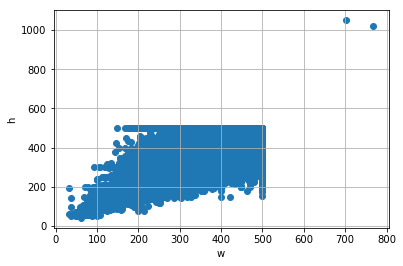

In [4]:
# 图像size-height
train_image_size_h = []
# 图像size-width
train_image_size_w = []
# 图像path
train_image_names = []

# 采集cat图像尺寸及路径
for item in cat_images:
    name = os.path.join(cat_images_path, item)
    train_image_names.append(name)
    
    image = cv2.imread(name)
    w, h, _ = image.shape
    train_image_size_h.append(h)
    train_image_size_w.append(w)
    
# 采集dog图像尺寸及路径
for item in dog_images:
    name = os.path.join(dog_images_path, item)
    train_image_names.append(name)
    
    image = cv2.imread(name)
    w, h, _ = image.shape
    train_image_size_h.append(h)
    train_image_size_w.append(w)
    
# 绘制图像尺寸散点图
plt.scatter(train_image_size_w, train_image_size_h)
plt.xlabel('w')
plt.ylabel('h')
plt.grid(True) #显示网格线
plt.show()

### 1.2 剔除非猫非狗等异常图像

#### 1.2.1 检查异常size图像

/home/sakulaki/code/udapro/dogcat/data/train/cat/cat.835.jpg
/home/sakulaki/code/udapro/dogcat/data/train/dog/dog.2317.jpg


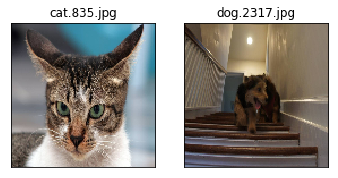

In [6]:
# 查看异常值点
abnormal_point_images = []
for i, item in enumerate(train_image_size_w):
    if item > 600:
        abnormal_point_images.append(train_image_names[i])
        
for item in abnormal_point_images:
    print(item)
    
# 显示异常点图像
image_list_display(abnormal_point_images)

#### 由上图可见，这两个size异常的图像也是正常的cat和dog图像，并非异常图像，故保留

#### 经过手工随机查阅，发现在数据集中还是存在非猫非狗图像
#### 在这里，我们引入Xception网络利用imagenet分类对训练集进行分类，如果topN不含有‘dog’或‘cat’视为异常值

#### 1.2.2 利用训练好的imagenet分类模型剔除训练集异常图像

In [3]:
# 导入Xception网络
from keras.applications import *
model_pre_detector=xception.Xception(weights='imagenet')

#### ImageNet有1000个类别对象，其中包含cat和dog的类别有（参考链接：https://blog.csdn.net/zhangjunbob/article/details/53258524）

In [4]:
dogs = [ 'n02085620','n02085782','n02085936','n02086079','n02086240','n02086646','n02086910','n02087046','n02087394','n02088094','n02088238',
        'n02088364','n02088466','n02088632','n02089078','n02089867','n02089973','n02090379','n02090622','n02090721','n02091032','n02091134',
        'n02091244','n02091467','n02091635','n02091831','n02092002','n02092339','n02093256','n02093428','n02093647','n02093754','n02093859',
        'n02093991','n02094114','n02094258','n02094433','n02095314','n02095570','n02095889','n02096051','n02096177','n02096294','n02096437',
        'n02096585','n02097047','n02097130','n02097209','n02097298','n02097474','n02097658','n02098105','n02098286','n02098413','n02099267',
        'n02099429','n02099601','n02099712','n02099849','n02100236','n02100583','n02100735','n02100877','n02101006','n02101388','n02101556',
        'n02102040','n02102177','n02102318','n02102480','n02102973','n02104029','n02104365','n02105056','n02105162','n02105251','n02105412',
        'n02105505','n02105641','n02105855','n02106030','n02106166','n02106382','n02106550','n02106662','n02107142','n02107312','n02107574',
        'n02107683','n02107908','n02108000','n02108089','n02108422','n02108551','n02108915','n02109047','n02109525','n02109961','n02110063',
        'n02110185','n02110341','n02110627','n02110806','n02110958','n02111129','n02111277','n02111500','n02111889','n02112018','n02112137',
        'n02112350','n02112706','n02113023','n02113186','n02113624','n02113712','n02113799','n02113978']
cats = ['n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']

### 进行异常值处理之前的各分类图像分布

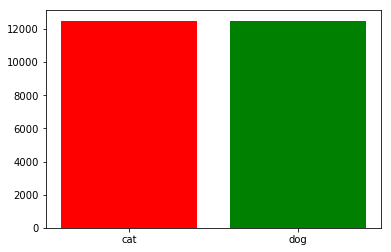

cat: 12500; dog: 12500


In [5]:
labels = ['cat', 'dog']
values = [cat_count, dog_count]

plt.bar(range(len(values)), values,color='rgb',tick_label=labels)
plt.show()

print("cat: %s; dog: %s" % (cat_count, dog_count))

#### 如上所示，进行异常值处理之前的cat和dog数量都为12500

In [6]:
# 图像resize处理，统一图像尺寸为299*299*3
# 训练图像原始路径
train_data_path = "/home/sakulaki/code/udapro/dogcat/data/train"
train_image_lst = []

# 遍历获取文件路径
train_image_lst.extend([os.path.join(train_data_path, 'cat', item) for item in os.listdir(train_data_path + "/cat") if item.endswith('.jpg')])
train_image_lst.extend([os.path.join(train_data_path, 'dog', item) for item in os.listdir(train_data_path + "/dog") if item.endswith('.jpg')])

print(len(train_image_lst))

25000


In [8]:
# 训练图像resize
resized_images_save_path = "/home/sakulaki/code/udapro/dogcat/data/resized/"
images = image_resize(train_image_lst, resized_images_save_path)

In [10]:
# 获取异常图像
X = xception.preprocess_input(images)
preds = model_pre_detector.predict(X)

In [ ]:
de_preds = xception.decode_predictions(preds, top=50)

abnormal = []
for d,jpg_name in zip(de_preds, jpg_list):
    for i,item in enumerate(d):
        if item[0] in dogs or item[0] in cats:
            break
        if i == len(d) - 1:
            abnormal.append(jpg_name)

In [12]:
abnormal_txt = "/home/sakulaki/code/udapro/dogcat/abnormal.txt"

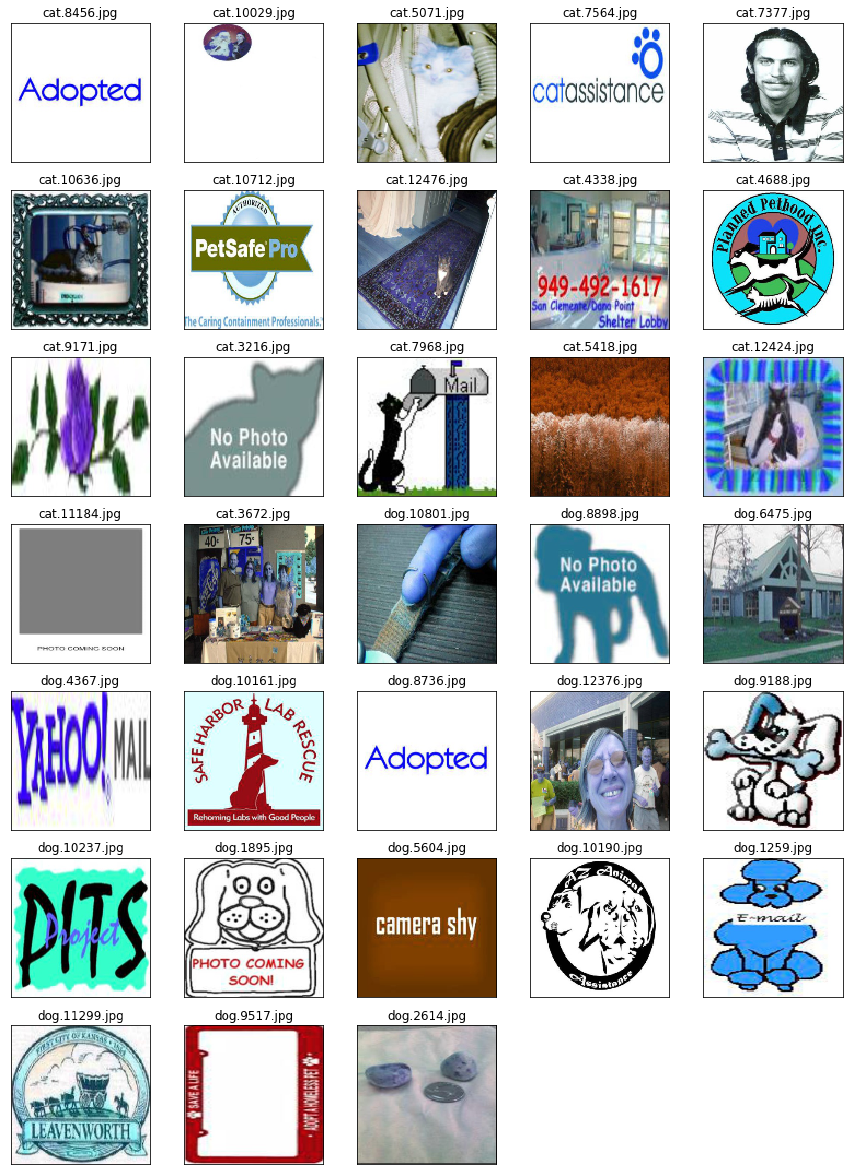

Abnormal Image count: 33


In [15]:
# 显示异常图像进行手动检查
abnormal = []
with open(abnormal_txt) as f:
    lines = f.readlines()
    abnormal = [item.replace('\n', '') for item in lines]

image_list_display(abnormal)
print('Abnormal Image count: %s' % len(abnormal))

#### 如上所示，共发现非猫非狗图像共计33张，将这些异常图像进行删除

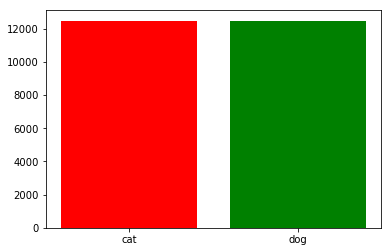

cat: 12483; dog: 12484


In [16]:
# 移除异常图像
for item in abnormal:
    os.remove(item)
    
# 再次统计分类分布
cat_count = len(os.listdir(os.path.join(resized_images_save_path, 'cat')))
dog_count = len(os.listdir(os.path.join(resized_images_save_path, 'dog')))

labels = ['cat', 'dog']
values = [cat_count, dog_count]

plt.bar(range(len(values)), values,color='rgb',tick_label=labels)
plt.show()

print("cat: %s; dog: %s" % (cat_count, dog_count))


## 2 模型训练
### 2.1 读取清洗过的训练数据及标签

In [1]:
from utils import *

# 获取图像路径
train_image_path = "/home/tsimage001/wangy/dogcat/data/resized/"
train_images_path = FilesScanner(train_image_path, suffix='.jpg').get_files()

# 图像shuffle
import random
random.shuffle(train_images_path)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

# 读取图像
images = []
# 获取标签
labels = [] 

for name in train_images_path:
    filename = os.path.basename(name)
    images.append(cv2.imread(name))
    if 'cat' in filename:
        labels.append(0)
    else:
        labels.append(1)
        
X = np.asarray(images)
Y = np.asarray(labels)

In [3]:
# 划分训练集和验证集,将训练数据分为5份，4份作为训练集，剩下的一份作为测试集
boundary = int(len(train_images_path) / 5)

# 验证集
valid_X = X[:boundary]
valid_Y = Y[:boundary]
# 训练集
train_X = X[boundary:]
train_Y = Y[boundary:]

In [4]:
# base model选用Xception，不包含top的分类器，随后在base model后边加一个二分类分类器
from keras.applications import *
from keras.models import Model
from keras.layers import Dense
import tensorflow as tf

from keras.utils.training_utils import multi_gpu_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from utils import LossHistory
from keras.models import load_model
from keras import callbacks
from keras.callbacks import ModelCheckpoint

In [6]:
# 参数设置
batch_size = 128
epochs = 30
steps_per_epoch = math.ceil(len(train_X)/batch_size)
valid_steps=math.ceil(len(valid_X)/batch_size)

# 数据增强
# 训练数据增强
train_datagen = ImageDataGenerator(preprocessing_function=xception.preprocess_input, 
                                    shear_range=0.2, 
                                    zoom_range=0.2, 
                                    horizontal_flip=True)
train_data = train_datagen.flow(x=train_X, y = train_Y, batch_size = batch_size, shuffle=True)

# 验证数据增强
valid_datagen = ImageDataGenerator(preprocessing_function=xception.preprocess_input) 
valid_data = valid_datagen.flow(x=valid_X, y=valid_Y, batch_size = batch_size, shuffle=False)

In [7]:
with tf.device('/cpu:0'):
    base_model = xception.Xception(weights='imagenet', input_shape = (299,299,3), include_top=False, pooling='avg')
    x = base_model.output

    # 二分类分类器
    predictions = Dense(1, activation='sigmoid')(x)
    
    # 冻结所有层，只训练top layer
    for layer in base_model.layers:
        layer.trainable = False
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # 打印层数
    for i, layer in enumerate(base_model.layers):
        print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_1
13 block2_pool
14 batch_normalization_1
15 add_1
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_2
23 block3_pool
24 batch_normalization_2
25 add_2
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_3
33 block4_pool
34 batch_normalization_3
35 add_3
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_4
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepcon

#### 2.2 冻结Xception，训练 top layer

In [8]:
# 编译模型,采用多GPU进行
parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

parallel_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 299, 299, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 299, 299, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            20863529    lambda_1[0][0]                   
                                                                 lambda_2[0][0]                   
__________

In [9]:
# 绘制结果曲线
history = LossHistory(model)

# earlyStopping用于当检测值不在改善时终止训练
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

# 保存点保存模型
model_save_path = "model-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ParallelModelCheckpoint(model, model_save_path)
#训练模型
parallel_model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valid_data, 
                    validation_steps=valid_steps,
                    callbacks=[history, earlyStopping, checkpoint])

Epoch 1/30
157/157 [==============================] - 220s 1s/step - loss: 0.5639 - acc: 0.7747 - val_loss: 0.4217 - val_acc: 0.9185

Epoch 00001: val_loss improved from inf to 0.42165, saving model to model-01-0.42.hdf5
Epoch 2/30
157/157 [==============================] - 205s 1s/step - loss: 0.3300 - acc: 0.9632 - val_loss: 0.2848 - val_acc: 0.9589

Epoch 00002: val_loss improved from 0.42165 to 0.28476, saving model to model-02-0.28.hdf5
Epoch 3/30
157/157 [==============================] - 204s 1s/step - loss: 0.2318 - acc: 0.9740 - val_loss: 0.2225 - val_acc: 0.9676

Epoch 00003: val_loss improved from 0.28476 to 0.22254, saving model to model-03-0.22.hdf5
Epoch 4/30
157/157 [==============================] - 205s 1s/step - loss: 0.1820 - acc: 0.9741 - val_loss: 0.1897 - val_acc: 0.9706

Epoch 00004: val_loss improved from 0.22254 to 0.18975, saving model to model-04-0.19.hdf5
Epoch 5/30
157/157 [==============================] - 203s 1s/step - loss: 0.1464 - acc: 0.9798 - val_lo

In [10]:
# 保存model
model.save('xception_finetune_top.h5')

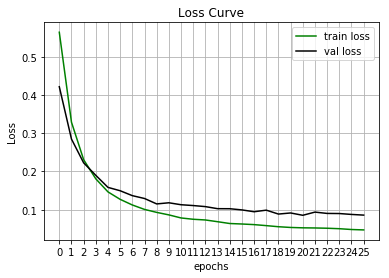

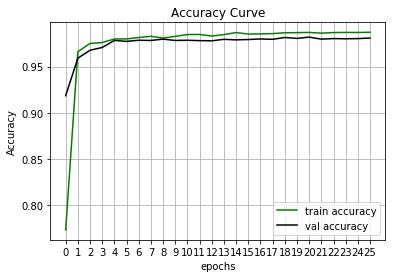

In [11]:
#绘制acc-loss曲线
history.loss_plot('epoch')

*从以上训练结果可以看出，在epoch=21时，达到了val_loss最低，但是后面几轮的训练表现出了val_loss继续下降的趋势，分析，由于epochs的值设置过小，或patient值设置较小，导致训练提前结束，还没达到最好的训练效果，可能出现抖动，故继续以下实验*

In [15]:
# 实验一，继续上步实验，以最终训练的model为开始，冻结所有层

In [12]:
epochs = 50
with tf.device('/cpu:0'):
    del model
    model = load_model('xception_finetune_top.h5')
    
    # 冻结所有层，只训练top layer
    for layer in base_model.layers:
        layer.trainable = False
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
# 编译模型,采用多GPU进行
parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 绘制结果曲线
history = LossHistory(model)

# earlyStopping用于当检测值不在改善时终止训练
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

# 保存点保存模型
model_save_path = "model-test-1-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ParallelModelCheckpoint(model, model_save_path)
#训练模型
parallel_model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valid_data, 
                    validation_steps=valid_steps,
                    callbacks=[history, earlyStopping, checkpoint])

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Epoch 1/50
157/157 [==============================] - 216s 1s/step - loss: 0.0475 - acc: 0.9866 - val_loss: 0.0774 - val_acc: 0.9832

Epoch 00001: val_loss improved from inf to 0.07740, saving model to model-test-1-01-0.08.hdf5
Epoch 2/50
157/157 [==============================] - 206s 1s/step - loss: 0.0487 - acc: 0.9859 - val_loss: 0.0794 - val_acc: 0.9826

Epoch 00002: val_loss did not improve from 0.07740
Epoch 3/50
157/157 [==============================] - 205s 1s/step - loss: 0.0455 - acc: 0.9871 - val_loss: 0.0832 - val_acc: 0.9808

Epoch 00003: val_loss did not improve from 0.07740
Epoch 4/50
157/157 [==============================] - 204s 1s/step - loss: 0.0507 - acc: 0.9841 - val_loss: 0.0744 - val_acc: 0.9838

Epoch 00004: val_loss improved from 0.07740 to 0.07438, saving model to model-test-1-04-0.07.hdf5
Epoch 5/50
157/157 [==============================] - 208s 1s/step - loss: 0.0432 - acc: 0.9873 - val_loss: 0.0793 - val_acc: 0.9822

Epoch 00005: val_loss did not improv

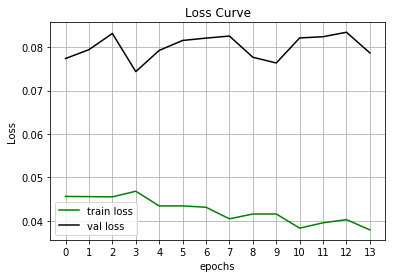

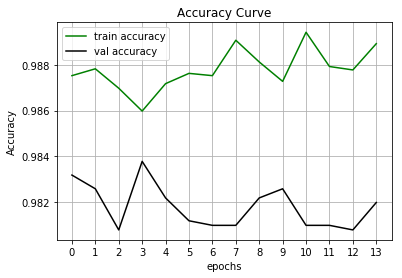

In [13]:
#绘制acc-loss曲线
history.loss_plot('epoch')

*从实验一的训练结果来看，在epoch=4时，达到最低的val_loss,故选用 model-test-1-04-0.07.hdf5 作为后续实验的base_model*

In [16]:
# 实验二，基于实验一结果，冻结前12个block，开放最后两个block

In [14]:
with tf.device('/cpu:0'):
    del model
    model = load_model('model-test-1-04-0.07.hdf5')

    for layer in model.layers[:116]:
        layer.trainable = False
    for layer in model.layers[116:]:
        layer.trainable = True
    
# 编译模型,采用多GPU进行
parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 绘制结果曲线
history = LossHistory(model)

# earlyStopping用于当检测值不在改善时终止训练
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
# 保存点保存模型
model_save_path = "model-test-2-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ParallelModelCheckpoint(model, model_save_path)
#训练模型
parallel_model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valid_data, 
                    validation_steps=valid_steps,
                    callbacks=[history, earlyStopping, checkpoint])

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Epoch 1/50
157/157 [==============================] - 218s 1s/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0192 - val_acc: 0.9938

Epoch 00001: val_loss improved from inf to 0.01924, saving model to model-test-2-01-0.02.hdf5
Epoch 2/50
157/157 [==============================] - 207s 1s/step - loss: 0.0149 - acc: 0.9946 - val_loss: 0.0207 - val_acc: 0.9930

Epoch 00002: val_loss did not improve from 0.01924
Epoch 3/50
157/157 [==============================] - 205s 1s/step - loss: 0.0106 - acc: 0.9962 - val_loss: 0.0302 - val_acc: 0.9922

Epoch 00003: val_loss did not improve from 0.01924
Epoch 4/50
157/157 [==============================] - 206s 1s/step - loss: 0.0067 - acc: 0.9978 - val_loss: 0.0311 - val_acc: 0.9922

Epoch 00004: val_loss did not improve from 0.01924
Epoch 5/50
157/157 [==============================] - 207s 1s/step - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0224 - val_acc: 0.9942

Epoch 00005: val_loss did not improve from 0.01924
Epoch 6/50
157/157 [============

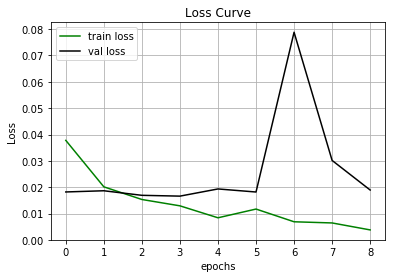

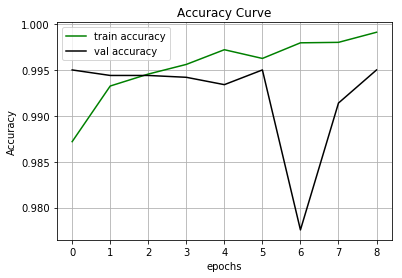

In [17]:
#绘制acc-loss曲线
history.loss_plot('epoch')

*从实验二的训练结果来看，在epoch=6时，达到最低的val_loss*

In [17]:
# 实验三，基于实验一结果，冻结前10个block，开放最后4个block

In [18]:
with tf.device('/cpu:0'):
    del model
    model = load_model('model-test-1-04-0.07.hdf5')

    for layer in model.layers[:96]:
        layer.trainable = False
    for layer in model.layers[96:]:
        layer.trainable = True
    
# 编译模型,采用多GPU进行
parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 绘制结果曲线
history = LossHistory(model)

# earlyStopping用于当检测值不在改善时终止训练
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
# 保存点保存模型
model_save_path = "model-test-3-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ParallelModelCheckpoint(model, model_save_path)
#训练模型
parallel_model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valid_data, 
                    validation_steps=valid_steps,
                    callbacks=[history, earlyStopping, checkpoint])

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Epoch 1/50
157/157 [==============================] - 222s 1s/step - loss: 0.0283 - acc: 0.9903 - val_loss: 0.0175 - val_acc: 0.9944

Epoch 00001: val_loss improved from inf to 0.01748, saving model to model-test-3-01-0.02.hdf5
Epoch 2/50
157/157 [==============================] - 210s 1s/step - loss: 0.0112 - acc: 0.9958 - val_loss: 0.0173 - val_acc: 0.9942

Epoch 00002: val_loss improved from 0.01748 to 0.01726, saving model to model-test-3-02-0.02.hdf5
Epoch 3/50
157/157 [==============================] - 210s 1s/step - loss: 0.0064 - acc: 0.9981 - val_loss: 0.0194 - val_acc: 0.9944

Epoch 00003: val_loss did not improve from 0.01726
Epoch 4/50
157/157 [==============================] - 211s 1s/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.0188 - val_acc: 0.9946

Epoch 00004: val_loss did not improve from 0.01726
Epoch 5/50
157/157 [==============================] - 210s 1s/step - loss: 0.0209 - acc: 0.9954 - val_loss: 0.0182 - val_acc: 0.9952

Epoch 00005: val_loss did not improv

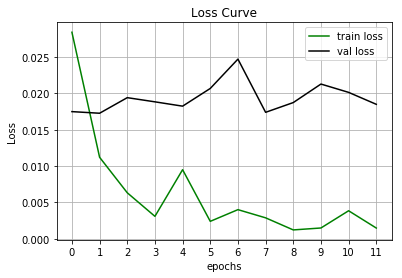

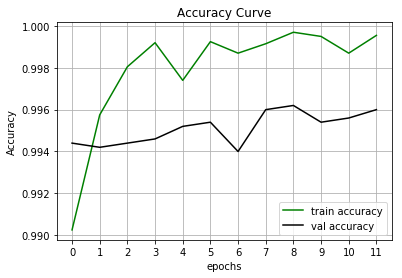

In [21]:
#绘制acc-loss曲线
history.loss_plot('epoch')

In [22]:
# 实验四，基于实验一结果，使用SGD优化器，冻结前10个block，一次性开放最后4个block

In [23]:
with tf.device('/cpu:0'):
    del model
    model = load_model('model-test-1-04-0.07.hdf5')

    for layer in model.layers[:96]:
        layer.trainable = False
    for layer in model.layers[96:]:
        layer.trainable = True
    
# 编译模型,采用多GPU进行
parallel_model = multi_gpu_model(model, gpus=2)

from keras.optimizers import SGD
parallel_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# 绘制结果曲线
history = LossHistory(model)

# earlyStopping用于当检测值不在改善时终止训练
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
# 保存点保存模型
model_save_path = "model-test-4-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ParallelModelCheckpoint(model, model_save_path)
#训练模型
parallel_model.fit_generator(train_data, steps_per_epoch=steps_per_epoch, epochs=epochs, 
                    validation_data=valid_data, 
                    validation_steps=valid_steps,
                    callbacks=[history, earlyStopping, checkpoint])

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Epoch 1/50
157/157 [==============================] - 227s 1s/step - loss: 0.0422 - acc: 0.9879 - val_loss: 0.0343 - val_acc: 0.9908

Epoch 00001: val_loss improved from inf to 0.03429, saving model to model-test-4-01-0.03.hdf5
Epoch 2/50
157/157 [==============================] - 210s 1s/step - loss: 0.0420 - acc: 0.9878 - val_loss: 0.0338 - val_acc: 0.9912

Epoch 00002: val_loss improved from 0.03429 to 0.03375, saving model to model-test-4-02-0.03.hdf5
Epoch 3/50
157/157 [==============================] - 210s 1s/step - loss: 0.0471 - acc: 0.9846 - val_loss: 0.0334 - val_acc: 0.9918

Epoch 00003: val_loss improved from 0.03375 to 0.03335, saving model to model-test-4-03-0.03.hdf5
Epoch 4/50
157/157 [==============================] - 212s 1s/step - loss: 0.0468 - acc: 0.9839 - val_loss: 0.0327 - val_acc: 0.9918

Epoch 00004: val_loss improved from 0.03335 to 0.03271, saving model to model-test-4-04-0.03.hdf5
Epoch 5/50
157/157 [==============================] - 211s 1s/step - loss: 0


Epoch 00036: val_loss improved from 0.02493 to 0.02481, saving model to model-test-4-36-0.02.hdf5
Epoch 37/50
157/157 [==============================] - 212s 1s/step - loss: 0.0282 - acc: 0.9907 - val_loss: 0.0245 - val_acc: 0.9928

Epoch 00037: val_loss improved from 0.02481 to 0.02449, saving model to model-test-4-37-0.02.hdf5
Epoch 38/50
157/157 [==============================] - 212s 1s/step - loss: 0.0284 - acc: 0.9905 - val_loss: 0.0246 - val_acc: 0.9928

Epoch 00038: val_loss did not improve from 0.02449
Epoch 39/50
157/157 [==============================] - 212s 1s/step - loss: 0.0332 - acc: 0.9887 - val_loss: 0.0244 - val_acc: 0.9930

Epoch 00039: val_loss improved from 0.02449 to 0.02438, saving model to model-test-4-39-0.02.hdf5
Epoch 40/50
157/157 [==============================] - 212s 1s/step - loss: 0.0302 - acc: 0.9896 - val_loss: 0.0241 - val_acc: 0.9930

Epoch 00040: val_loss improved from 0.02438 to 0.02411, saving model to model-test-4-40-0.02.hdf5
Epoch 41/50
157/

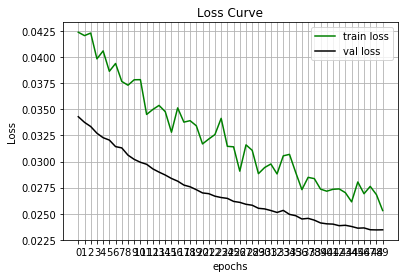

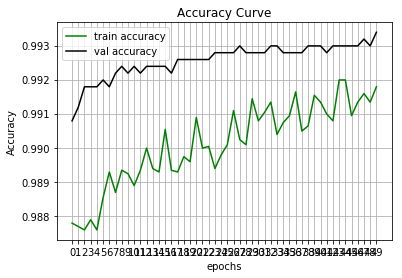

In [24]:
#绘制acc-loss曲线
history.loss_plot('epoch')

#### 2.4 执行测试集

In [1]:
from utils import *
from keras.applications import *
import tensorflow as tf

from keras.utils.training_utils import multi_gpu_model
from keras.models import load_model

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 测试集预处理
# test_images_path = "/home/tsimage001/wangy/dogcat/data/test/"
resized_test_images_path = "/home/tsimage001/wangy/dogcat/data/test_resized"
# test_images_lst = [os.path.join(test_images_path, item) for item in os.listdir(test_images_path)]
# images = image_resize(test_images_lst, resized_test_images_path)

In [3]:
test_images_path = FilesScanner(resized_test_images_path, suffix='.jpg').get_files()

batch_size = 128
batches = []
for begin in range(0, len(test_images_path), batch_size):
    end = min(begin+batch_size, len(test_images_path))
    batches.append(test_images_path[begin:end])

# 读取图像
images = []
for batch in batches:
    vals = []
    for name in batch:
        vals.append(cv2.imread(name))
        
    images.append(np.asarray(vals))

In [4]:
import csv

# 使用五个实验（包括最初训练的顶部model的最优模型）生成的可用的model对测试集进行预测
model_list = ['model-21-0.09.hdf5', 'model-test-1-04-0.07.hdf5', 'model-test-2-06-0.02.hdf5', 
              'model-test-3-02-0.02.hdf5', 'model-test-4-49-0.02.hdf5']

# predict for model 1
with tf.device('/cpu:0'):
    model = load_model(model_list[0])
    
print("prediction for model 1...")
parallel_model = multi_gpu_model(model, gpus=2)
preds_1 = []
for image in images:     
    X = xception.preprocess_input(image)
    preds_1.extend(parallel_model.predict_on_batch(X).clip(min=0.005, max=0.995))
    
# predict for model 2
with tf.device('/cpu:0'):
    model = load_model(model_list[1])
    
print("prediction for model 2...")
parallel_model = multi_gpu_model(model, gpus=2)
preds_2 = []
for image in images:     
    X = xception.preprocess_input(image)
    preds_2.extend(parallel_model.predict_on_batch(X).clip(min=0.005, max=0.995))
    
# predict for model 3
with tf.device('/cpu:0'):
    model = load_model(model_list[2])

print("prediction for model 3...")
parallel_model = multi_gpu_model(model, gpus=2)
preds_3 = []
for image in images:     
    X = xception.preprocess_input(image)
    preds_3.extend(parallel_model.predict_on_batch(X).clip(min=0.005, max=0.995))
    
# predict for model 4
with tf.device('/cpu:0'):
    model = load_model(model_list[3])

print("prediction for model 4...")
parallel_model = multi_gpu_model(model, gpus=2)
preds_4 = []
for image in images:     
    X = xception.preprocess_input(image)
    preds_4.extend(parallel_model.predict_on_batch(X).clip(min=0.005, max=0.995))
    
# predict for model 5
with tf.device('/cpu:0'):
    model = load_model(model_list[4])

print("prediction for model 5...")
parallel_model = multi_gpu_model(model, gpus=2)
preds_5 = []
for image in images:     
    X = xception.preprocess_input(image)
    preds_5.extend(parallel_model.predict_on_batch(X).clip(min=0.005, max=0.995))

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


prediction for model 1...
prediction for model 2...
prediction for model 3...
prediction for model 4...
prediction for model 5...


In [5]:
# 将测试结果写入csv
preds = [preds_1, preds_2, preds_3, preds_4, preds_5]
for index, prediction in enumerate(preds):
    with open('output_%s.csv' % index, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["id", "label"])
        for index, path in enumerate(test_images_path):
            filename = os.path.basename(path)
            fname = filename.split(".")[0]
            class_name = (prediction[index][0])
            writer.writerow([fname, class_name])